In [2]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
import json
from konlpy.tag import *
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:


okt = Okt()

encText = urllib.parse.quote("다이어트")
url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&display=100" # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
client_id     = "3iwm4kBmOyvA7t92v3fy"
client_secret =  "9MmJsBKKUj"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
str1 = ""
if(rescode==200):
    response_body = response.read()
    # print(response_body.decode('utf-8'))
    respnose_json = json.loads(response_body.decode('utf-8'))
    items = respnose_json['items']
    for item in items:
        str1 += item['title'] + " "
        print(item['title'])
else:
    print("Error Code:" + rescode)

#print(str1)

'밝히는가' 홍지윤의 미모 비결?…번지피트니스+푸드테라피로 가꾼 특급 비주...
aT, 라이브 커머스로 저탄소 식생활 등 다채로운 테마 기획전 연다
美 대학들, 알레르기·식이요법 급증에 “식단 짜기 어렵다” 볼멘소리
궂은 날씨 알려주는 무릎통증… 퇴행성 관절염, 초기 치료 중요해
디케이닥터 2023 MEDICAL RESEARCH KOREA 공동 주관
장영란, 쏙 들어간 뱃살 &quot;10일 <b>다이어트</b> 결과 4㎏ 감량&quot;
노보 노디스크 유럽 시총 1위, 비만 치료주사제 ‘위고비’ 덕분
'댄싱 퀸' 등극 노리는 이채연 &quot;춤은 내 인생&quot;[인터뷰]
추성훈이 운동 후 먹는 '단백질 셰이크'… 어떤 재료 들어갈까?
솔루엠 헬스케어, ‘IFA 2023’ 참가.. “무선 이어버드 EARX” 선봬
이완섭 서산시장, 본사 이전 에프엔바이오㈜ 공장 준공식 개최
“루이비통 드는 대신 살뺄래”...LVMH 시총 1위 밀려난 이유
aT, 다양한 라이브 커머스 테마 기획전 개최
하이트진로음료 '진로토닉 와일드피치' 전국 대형마트 3사 판매
“대전 ‘0시 축제’ 일회용품 사용 실태 낙제점…시, 상인에 책임 전가”
미국 유럽 휩쓴 비만치료제 '위고비'의 놀라운 상승세, 비결은?
'진로토닉 와일드피치', 전국 대형마트 3사 입점·판매
'뱃살 홀쭉' 장영란, 10일 만에 4kg 감량…살 빨리 빼는 비결은?
'밝히는가' 홍지윤, 번지피트니스도 척척…&quot;운동 많이 돼&quot;
서산시, 에프엔바이오 공장 준공식 열려
하이트진로음료 신제품 '진로토닉 와일드피치', 대형마트서 만난다
하이트진로음료 '진로토닉 와일드피치' 대형마트 3사 입점
서산시, '본사 이전' 에프엔바이오㈜ 공장 준공식
서산시, 에프엔바이오㈜ 공장 준공식 열려
김세정 &quot;배우와 가수 <b>다이어트</b> 달라…활동 길어지면 힘들다&quot;
최애의 아이는 있을까?
52kg 황정음, 리즈 복귀 비주얼 어디 가고 휑한 이마 깜짝 “인생은…아름다워...
김세정 &quot;<b>다이어트<

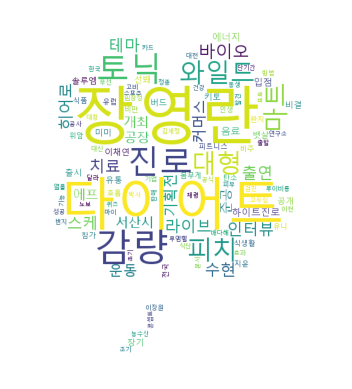

In [4]:
str1_text = okt.nouns(str1)
str1_text_counter = Counter(str1_text)

str1_text_counter_commons = dict()

for tag, count in str1_text_counter.items():
    if len(tag) > 1 and count > 1:
        str1_text_counter_commons[tag] = count

path = 'c:/Windows/Fonts/malgun.ttf'
myimg = Image.open('data/clover.jpg')
myimg_list = np.array(myimg)

wc = WordCloud(width=800, height=600, background_color='white', font_path=path, mask=myimg_list)
plt.imshow(wc.generate_from_frequencies(str1_text_counter_commons))
plt.axis('off')
plt.show()


In [5]:
okt = Okt()

encText = urllib.parse.quote("다이어트")
url = "https://openapi.naver.com/v1/search/shop?query=" + encText + "&display=100" # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
client_id     = "3iwm4kBmOyvA7t92v3fy"
client_secret =  "9MmJsBKKUj"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
img_link_list = []
if(rescode==200):
    response_body = response.read()
    #print(response_body.decode('utf-8'))
    respnose_json = json.loads(response_body.decode('utf-8'))
    items = respnose_json['items']
    for item in items:
        #print(item)
        img_link_list.append(item['image'])
else:
    print("Error Code:" + rescode)

# print(img_link_list)

In [8]:
i = 1
for link in img_link_list:
    save_name = 'data/images/' + str(i) + ".jpg"
    print(link)
    try:
        urllib.request.urlretrieve(link, save_name)
        i += 1
        #img = Image.open(save_name)
        print("저장성공")
    except:
        print("저장실패")

https://shopping-phinf.pstatic.net/main_8524189/85241896798.jpg
저장성공
https://shopping-phinf.pstatic.net/main_3105484/31054844618.20220223153650.jpg
저장성공
https://shopping-phinf.pstatic.net/main_8579714/85797140257.jpg
저장성공
https://shopping-phinf.pstatic.net/main_8597823/85978237841.6.jpg
저장성공
https://shopping-phinf.pstatic.net/main_8524759/85247591580.20.jpg
저장성공
https://shopping-phinf.pstatic.net/main_8633056/86330566939.jpg
저장성공
https://shopping-phinf.pstatic.net/main_3306280/33062807619.20220621162704.jpg
저장성공
https://shopping-phinf.pstatic.net/main_8379010/83790103187.29.jpg
저장성공
https://shopping-phinf.pstatic.net/main_8352032/83520320102.1.jpg
저장성공
https://shopping-phinf.pstatic.net/main_8655274/86552741678.jpg
저장성공
https://shopping-phinf.pstatic.net/main_8428219/84282192438.16.jpg
저장성공
https://shopping-phinf.pstatic.net/main_8433658/84336582432.16.jpg
저장성공
https://shopping-phinf.pstatic.net/main_3135726/31357264618.20230612123621.jpg
저장성공
https://shopping-phinf.pstatic.net/main_86